In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
list_data = ['L01_switch4', 'L10_switch4', 'L20_switch4', 'L11_switch4', 'L13_sensor123','L23_sensor123', 'L03_sensor003', 'L14_sensor003']

data = {}
for i in list_data:
    value = pd.read_csv('datasets/{}.csv'.format(i))
    data[i] = value
    
for key, value in data.items():
    print('{}\n{}\n'. format(key, data[key].head(3)))
    8

L01_switch4
     Moisture  Soil_temp         EC                 time
0  21177386.0      21.00  3697342.0  2020-10-14 12:57:19
1  21174487.0      21.06  3697293.0  2020-10-14 12:57:26
2  21186246.0      21.00  3697328.0  2020-10-14 12:57:58

L10_switch4
     Moisture  Soil_temp         EC                 time
0  21007502.0      21.75  3697675.0  2020-10-28 12:47:07
1  21013755.0      21.75  3697738.0  2020-10-28 12:47:25
2  21012381.0      21.75  3698120.0  2020-10-28 12:47:31

L20_switch4
     Moisture  Soil_temp         EC                 time
0  20976257.0      21.25  3697647.0  2020-10-28 10:52:00
1  20973250.0      21.31  3697468.0  2020-10-28 10:52:06
2  20964070.0      21.43  3697906.0  2020-10-28 10:53:18

L11_switch4
     Moisture  Soil_temp         EC                 time
0  21287378.0      22.06  3697202.0  2020-10-05 15:01:35
1  21287378.0      22.06  3696634.0  2020-10-05 15:01:47
2  21284758.0      22.06  3696690.0  2020-10-05 15:01:53

L13_sensor123
     Moisture  Soil_te

---
Some soils have additional columns of Air_Hum and Ai_temp. These features were not measured so we can drop them. 

---

In [3]:
# drop Air_Hum, Air_temp columns

drop_data = ['L03_sensor003', 'L13_sensor123', 'L14_sensor003', 'L23_sensor123']

for i in drop_data:
    data[i] = data[i].drop(['Air_Hum', 'Air_temp'], axis = 1)

In [4]:
# print soils again

for key, value in data.items():
    print('{}\n{}\n'. format(key, data[key].head(3)))

L01_switch4
     Moisture  Soil_temp         EC                 time
0  21177386.0      21.00  3697342.0  2020-10-14 12:57:19
1  21174487.0      21.06  3697293.0  2020-10-14 12:57:26
2  21186246.0      21.00  3697328.0  2020-10-14 12:57:58

L10_switch4
     Moisture  Soil_temp         EC                 time
0  21007502.0      21.75  3697675.0  2020-10-28 12:47:07
1  21013755.0      21.75  3697738.0  2020-10-28 12:47:25
2  21012381.0      21.75  3698120.0  2020-10-28 12:47:31

L20_switch4
     Moisture  Soil_temp         EC                 time
0  20976257.0      21.25  3697647.0  2020-10-28 10:52:00
1  20973250.0      21.31  3697468.0  2020-10-28 10:52:06
2  20964070.0      21.43  3697906.0  2020-10-28 10:53:18

L11_switch4
     Moisture  Soil_temp         EC                 time
0  21287378.0      22.06  3697202.0  2020-10-05 15:01:35
1  21287378.0      22.06  3696634.0  2020-10-05 15:01:47
2  21284758.0      22.06  3696690.0  2020-10-05 15:01:53

L13_sensor123
     Moisture  Soil_te

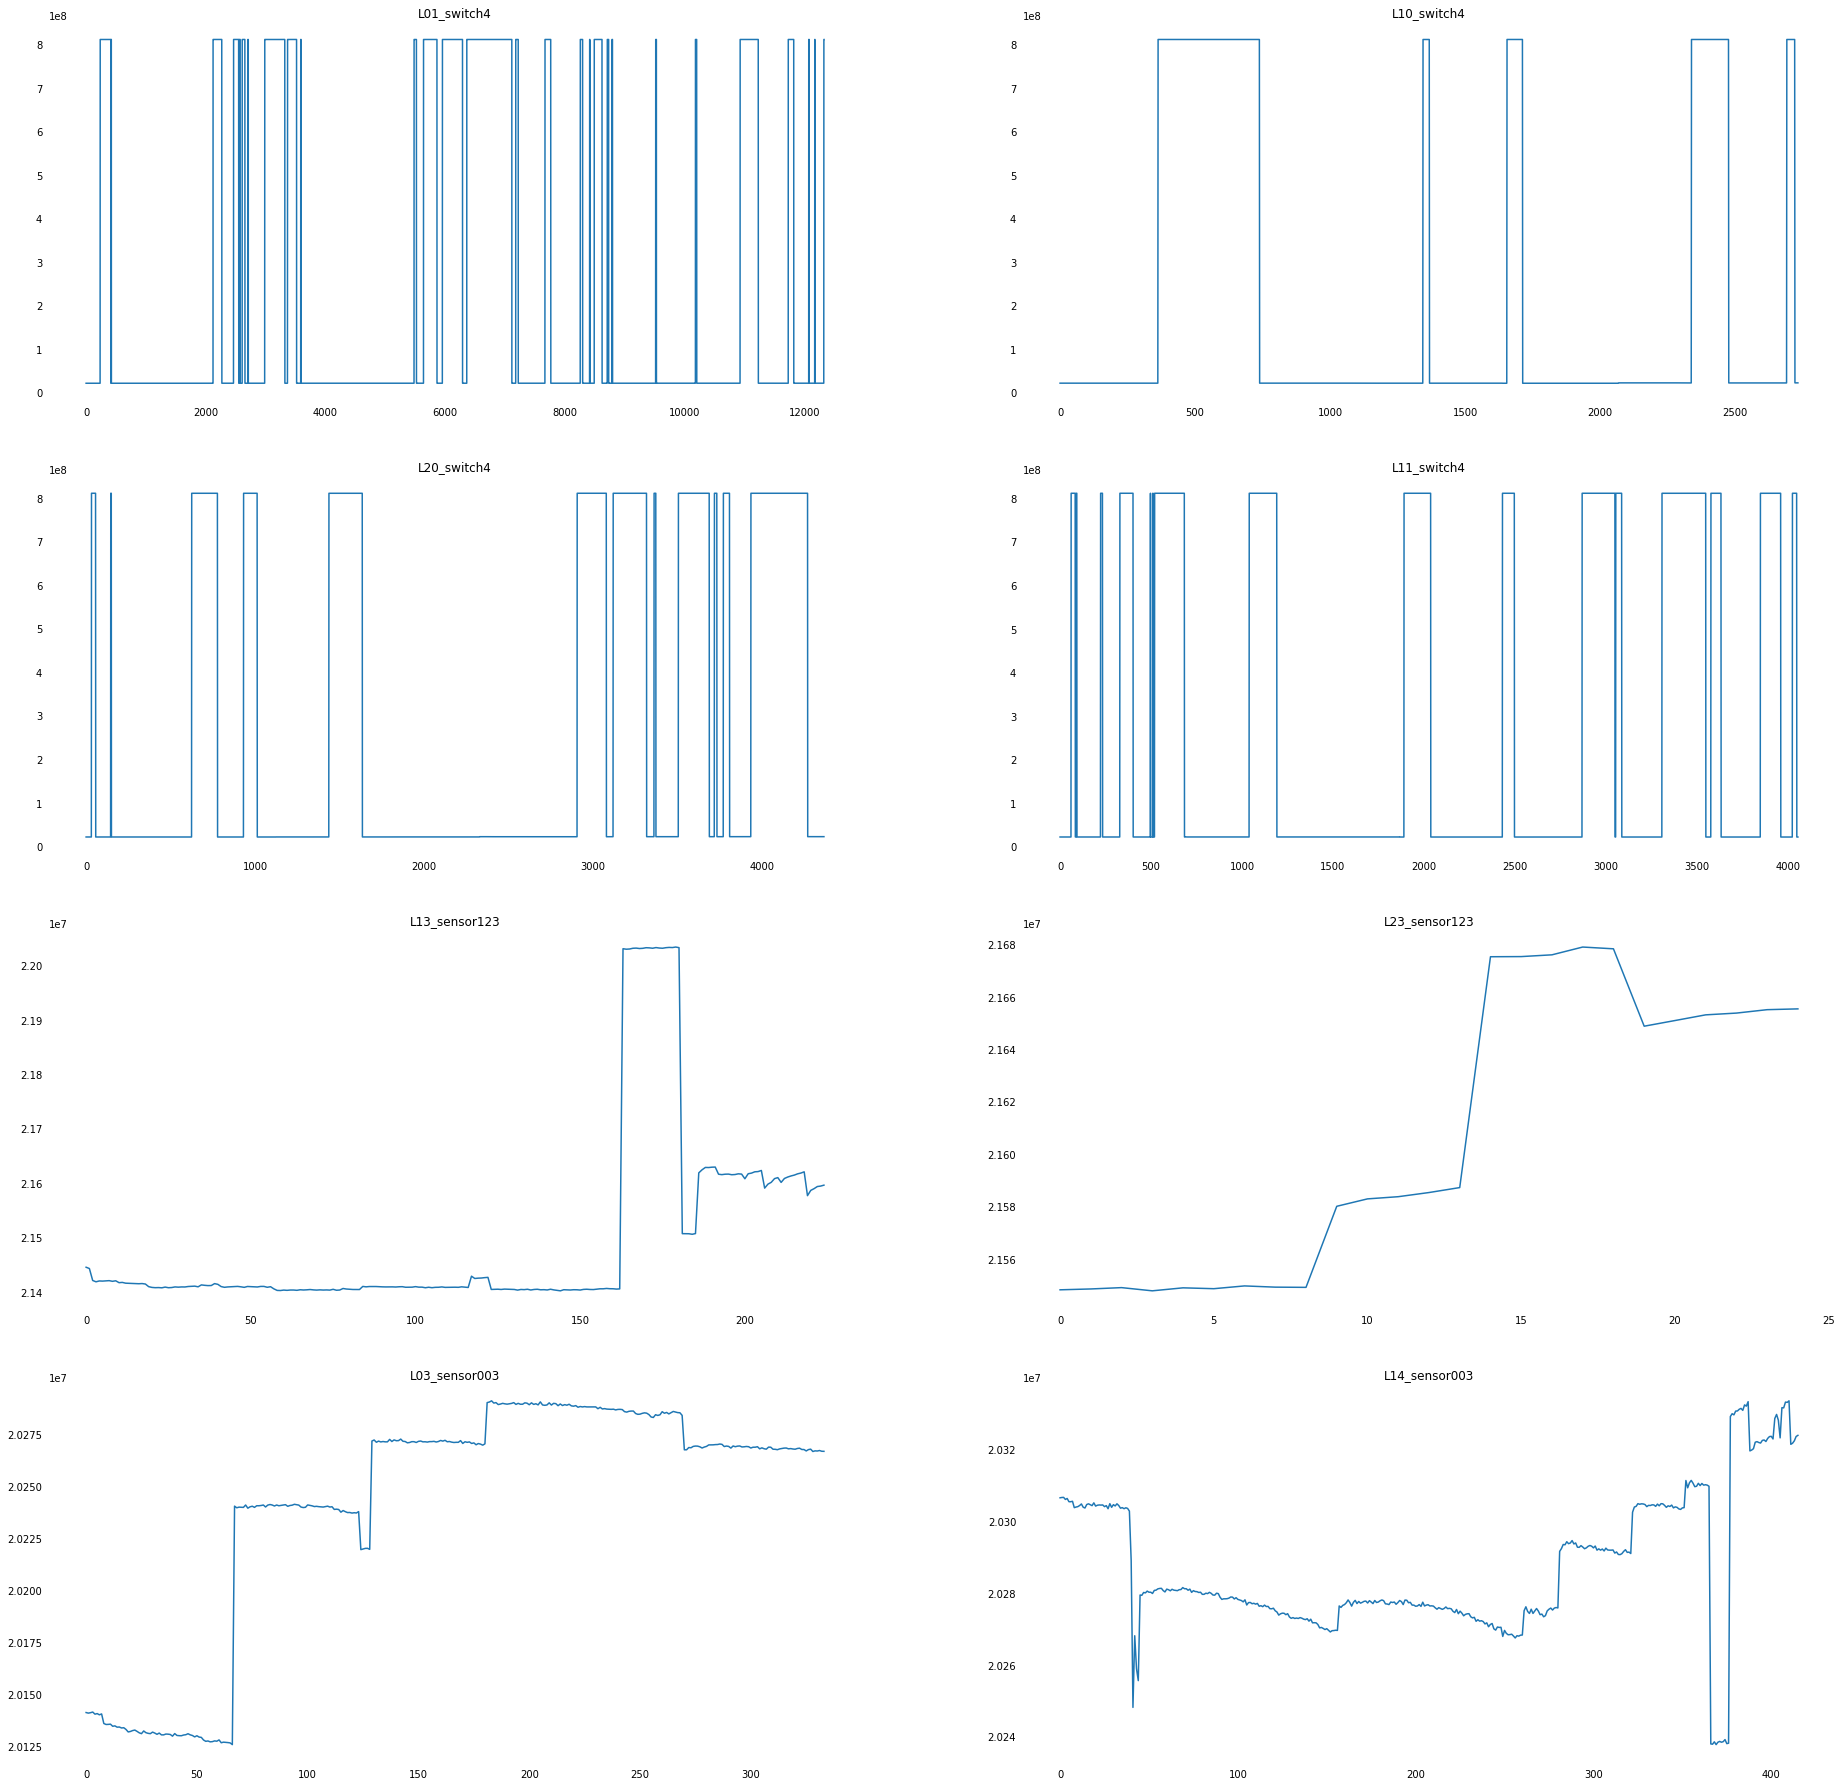

In [19]:
fig = plt.figure(figsize = (32, 32))

for i in range(0,8):
    ax = fig.add_subplot(4,2,i+1)

    ax.plot(data[list_data[i]]['Moisture'], label = 'Moisture')
    ax.set_title(list_data[i])
    for key in ax.spines:
        ax.spines[key].set_visible(False)
    ax.tick_params(bottom = False, top = False, left = False, right = False)

plt.show()

---
We can see from graphs of moisture above, that each sensor gives different data.

In [ ]:
for key,value in data.items():
    data[key]['time'] = pd.to_datetime(data[key]['time'])
    data[key].set_index('time', inplace = True)
    
    
data['L14'].head()

In [ ]:
data['L14'].loc['2020-10-07']


In [ ]:
for key, value in data.items():
    data[key].info()

In [ ]:
data['L14'].reset_index().plot(kind = 'scatter', x = 'time', y ='Moisture')


In [ ]:
plt.plot(data['L01']['Moisture'])

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.plot(data['L01']['Moisture'])

plt.subplot(3,1,2)
plt.plot(data['L11']['Moisture'])

plt.subplot(3,1,3)
plt.plot(data['L14']['Moisture'])

                             


In [ ]:
data['L14'].head(20)

 Once you have the data, please compare soil test data from the laboratory with different sensor data and see which sensor data is reliable or more homogenous for measurements. With the help of temperature data (you get temperature data from our sensors and also hanna instruments sensors). So you can manually record the sensor data from the hanna instruments sensor as well. 

See how the temperature affects the reduction rate of moisture and we can find more correlation based on the type of soil in the next steps. If you have any questions, let me know. 